In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from collections import Counter
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
import scipy 
from scipy.stats import linregress
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from collections import Counter
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from statsmodels.formula.api import ols
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn import metrics
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.cross_validation import KFold, cross_val_score, train_test_split

C:\Users\Nirali\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\Nirali\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 15, 9
sb.set_style('whitegrid')

In [3]:
wine =  'winequality-white.csv'
wine = pd.read_csv(wine)
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  quality_cat  
0      8.8        6            0  
1      9.5        6            0  
2     10.1        6            0  
3      9.9        6            0  
4      9.9        6            0

In [4]:
def set_colors(labels, colors='rgbykcmw'):
    colored_labels = []
    for label in labels:
        if (label < 0) or (label > 6):
          colored_labels.append(colors[7]) 
        else:
          colored_labels.append(colors[label])
    return colored_labels


# Clustering

# K means Clustering

Counter({0: 3116, 1: 1782})


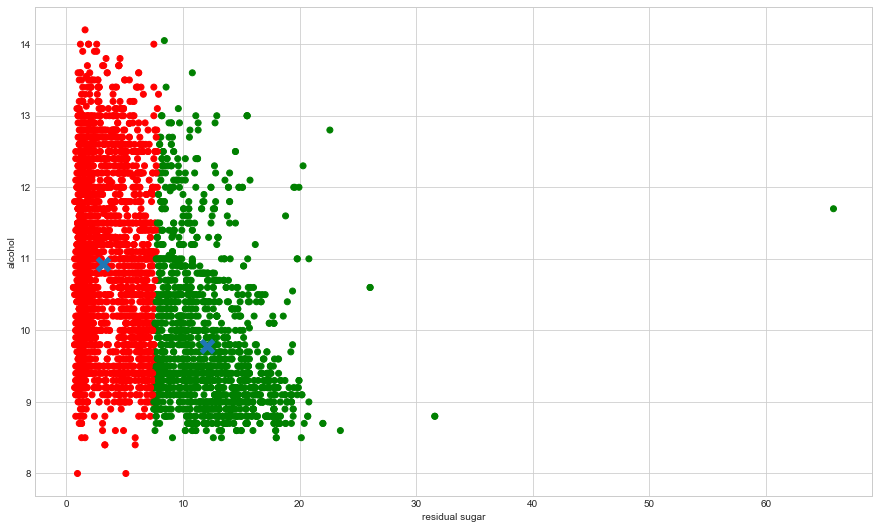

[[  3.1451587   10.93361654]
 [ 12.08285554   9.77905003]]
silhoutte coefficient using k-means =  0.596596200433


In [5]:

# Fit a k-means estimator
estimator = KMeans(n_clusters=2)
X = wine[["residual sugar", "alcohol"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
centroids = estimator.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker="x",s=150,linewidth=5,zorder=10)
plt.scatter(wine["residual sugar"], wine["alcohol"], c=colors)
plt.xlabel("residual sugar")
plt.ylabel("alcohol")
plt.show()
print(centroids)

print('silhoutte coefficient using k-means = ', metrics.silhouette_score(X, labels, metric='euclidean'))

# Hierarchial Clustering

Counter({0: 3653, 1: 1245})


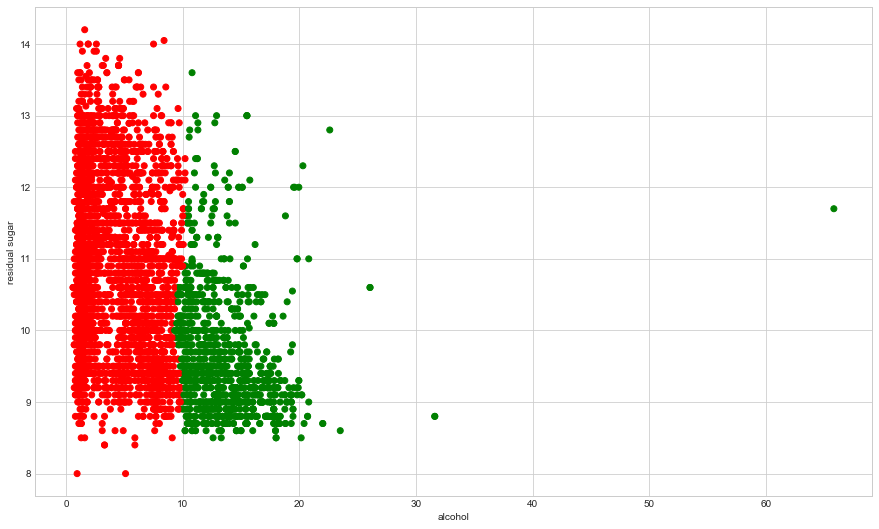

silhoutte coeffiecient using hierarchial method =  0.595212502663


In [6]:
# Hierarchical: Agglomerative Clustering


# Fit an estimator
estimator = AgglomerativeClustering(n_clusters=2)
X = wine[["residual sugar", "alcohol"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(wine['residual sugar'], wine['alcohol'], c=colors)
plt.xlabel("alcohol")
plt.ylabel("residual sugar")
plt.show()

print ('silhoutte coeffiecient using hierarchial method = ', metrics.silhouette_score(X, labels, metric='euclidean'))

# Dendogram

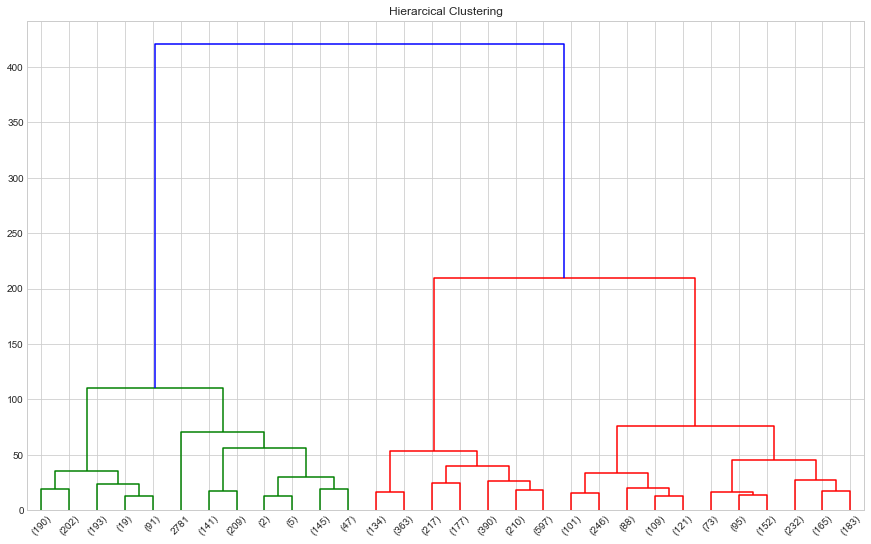

In [7]:
linkage_matrix = linkage(wine[['residual sugar','alcohol']],'ward')
dendogram = dendrogram(linkage_matrix,truncate_mode='lastp')
plt.title('Hierarcical Clustering')

plt.show()

# Scaling

In [8]:
scaledData = scale(wine)
scaledData

array([[ 0.17209696, -0.0817699 ,  0.2132802 , ..., -1.39315246,
         0.13787014, -0.52553355],
       [-0.65750113,  0.21589563,  0.04800112, ..., -0.82427568,
         0.13787014, -0.52553355],
       [ 1.4757511 ,  0.01745194,  0.54383836, ..., -0.33666701,
         0.13787014, -0.52553355],
       ..., 
       [-0.4204731 , -0.37943543, -1.19159198, ..., -0.90554379,
         0.13787014, -0.52553355],
       [-1.60561323,  0.11667379, -0.28255704, ...,  1.85757201,
         1.2671142 ,  1.90282808],
       [-1.01304317, -0.67710097,  0.37855928, ...,  1.04489089,
         0.13787014, -0.52553355]])

In [9]:
wine_scaled = pd.DataFrame(scaledData,columns=['fixed.acidity','volatile.acidity','citric.acid','residual.sugar','chlorides','free.sulfur.dioxide',
                                           'total.sulfur.dioxide','density','pH','sulphates','alcohol','quality', 'quality_cat'])
wine_scaled.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0       0.172097         -0.081770     0.213280        2.821349  -0.035355   
1      -0.657501          0.215896     0.048001       -0.944765   0.147747   
2       1.475751          0.017452     0.543838        0.100282   0.193523   
3       0.409125         -0.478657    -0.117278        0.415768   0.559727   
4       0.409125         -0.478657    -0.117278        0.415768   0.559727   

   free.sulfur.dioxide  total.sulfur.dioxide   density        pH  sulphates  \
0             0.569932              0.744565  2.331512 -1.246921  -0.349184   
1            -1.253019             -0.149685 -0.009154  0.740029   0.001342   
2            -0.312141             -0.973336  0.358665  0.475102  -0.436816   
3             0.687541              1.121091  0.525855  0.011480  -0.787342   
4             0.687541              1.121091  0.525855  0.011480  -0.787342   

    alcohol  quality  quality_cat  
0 -1.393152  0.13787    -0.525534  
1 -0.824276  0.13787    -0.525534  
2 -0.336667  0.13787    -0.525534  
3 -0.499203  0.13787    -0.525534  
4 -0.499203  0.13787    -0.525534

# K means Clustering with scaled data

Counter({0: 2921, 1: 1977})


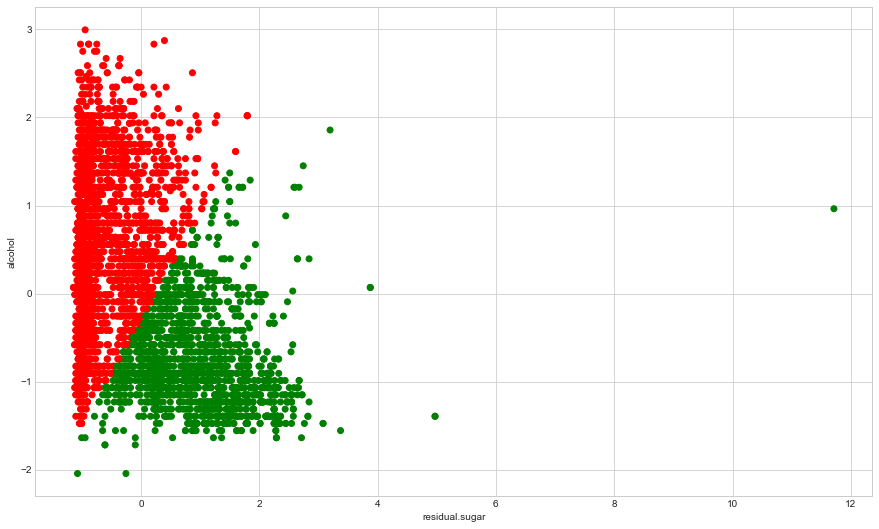

silhoutte_coefficient for k-means with scaled data =  0.457165312329


In [10]:


# Fit a k-means estimator
estimator = KMeans(n_clusters=2)
X = wine_scaled[["residual.sugar", "alcohol"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(wine_scaled["residual.sugar"], wine_scaled["alcohol"], c=colors)
plt.xlabel("residual.sugar")
plt.ylabel("alcohol")
plt.show()


print('silhoutte_coefficient for k-means with scaled data = ', metrics.silhouette_score(X, labels, metric='euclidean'))


# Hierarchial Clustering with scaled Data

Counter({0: 3413, 1: 1485})


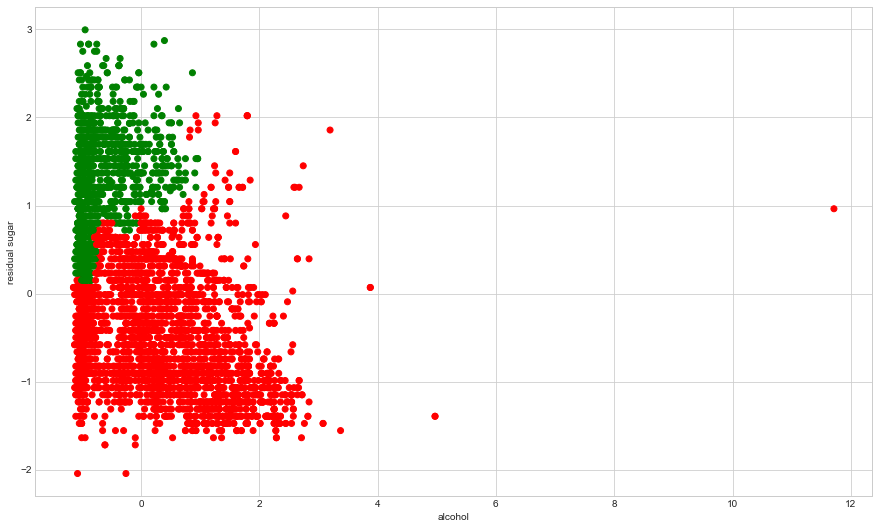

silhoutte coeffiecient for Hierarchial with scaled data =  0.366722749418


In [11]:
# Hierarchical: Agglomerative Clustering


# Fit an estimator
estimator = AgglomerativeClustering(n_clusters=2)
X = wine_scaled[["residual.sugar", "alcohol"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(wine_scaled['residual.sugar'], wine_scaled['alcohol'], c=colors)
plt.xlabel("alcohol")
plt.ylabel("residual sugar")
plt.show()

print ('silhoutte coeffiecient for Hierarchial with scaled data = ', metrics.silhouette_score(X, labels, metric='euclidean'))

Clustering:
1.	Do the clustering methods generate the same clusters?
Yes, both the clustering methods K-means and hierarchical generate the same clusters  

2.	Does scaling effect the clustering?
Yes, Scaling affects clustering in a negative way for k-means.
This can be determined from the silhouette coefficient.
The silhouette coefficient for k-means without using scaled data is 0.59 and when using scaled data is 0.45
Yes, scaling affects the clustering in a negative way for hierarchical clustering
The silhouette coefficient for hierarchical without using scaled data is 0.59 and when using scaled data is 0.36

3.	Does the clustering produce interesting groupings?
The clustering does not produce very interesting grouping since the clusters are too near which makes it difficult to classify it.


# Linear Regression

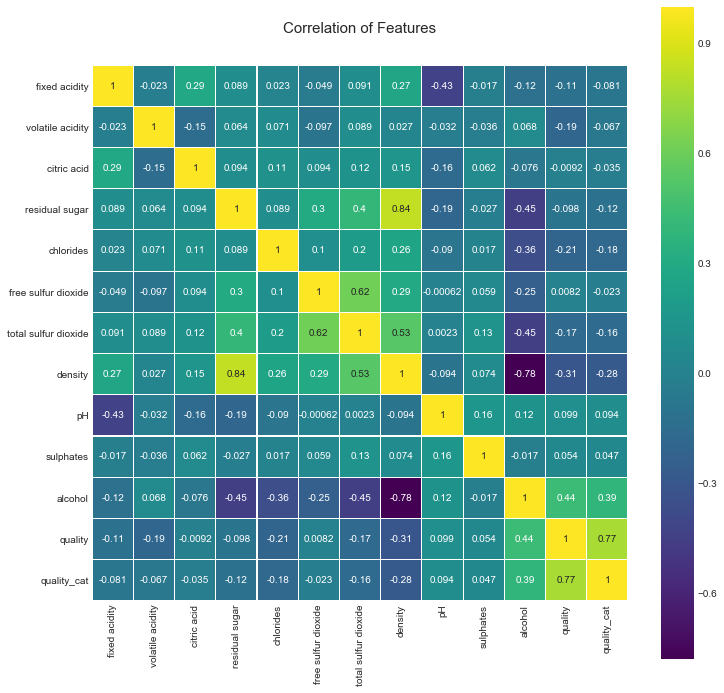

In [12]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=15)
sb.heatmap(wine.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, 
           linecolor='white', annot=True)

In [13]:
X = wine[['residual sugar', 'alcohol']]
y = wine['density']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)


In [15]:
lm = LinearRegression()

In [16]:

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
# print the intercept
print(lm.intercept_)

1.00496755232


In [18]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
residual sugar     0.000350
alcohol           -0.001253

In [19]:
predictions = lm.predict(X_test)
print(predictions)

[ 0.99119581  0.99002164  0.99289432 ...,  0.99323519  0.99215427
  0.99103557]


Text(0,0.5,'predictions')

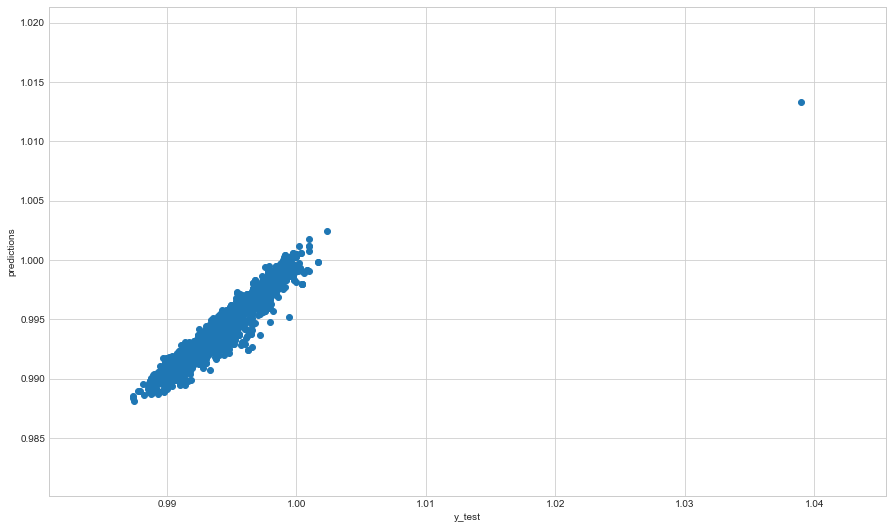

In [20]:
plt.scatter(y_test,predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')

# Summary of Linear Regression

In [21]:
result = sm.OLS( y, X ).fit()
result.pvalues
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                density   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.535e+05
Date:                Fri, 16 Feb 2018   Prob (F-statistic):               0.00
Time:                        23:36:44   Log-Likelihood:                 4466.2
No. Observations:                4898   AIC:                            -8928.
Df Residuals:                    4896   BIC:                            -8915.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
residual sugar     0.0123      0.000     47.973      0.000       0.012       0.013
alcohol            0.0862      0.000    437.723      0.000       0.086       0.087
==============================================================================
Omnibus:                      281.162   Durbin-Watson:                   1.545
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              355.151
Skew:                          -0.559   Prob(JB):                     7.59e-78
Kurtosis:                       3.700   Cond. No.                         2.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# RMSE of Linear Regression 

In [22]:
rmse =  np.sqrt(metrics.mean_squared_error(y_test,predictions))
print(rmse)

0.00100665690092


# Determining if relationship is significant by Hypothesis test

slope =  0.000494724366304
intercept = 0.990865387812
r_value =  0.838966454905
p_value =  0.0
4.58609535524e-06


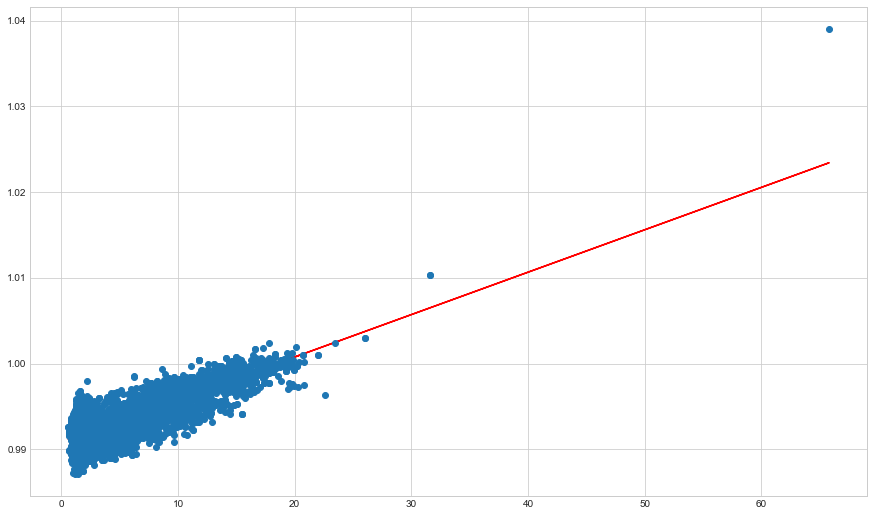

In [23]:
x_rs = wine['residual sugar']
slope, intercept, r_value, p_value, std_err = linregress(x_rs,y)
print('slope = ', slope)
print('intercept =',intercept)
print('r_value = ', r_value)
print('p_value = ',p_value)
print(std_err)
from pylab import plot,show
line = slope*x_rs+intercept
plot(x_rs,line,'r-',x_rs,y,'o')

show()

slope =  -0.00189605071557
intercept = 1.01396296004
r_value =  -0.780137621426
p_value =  0.0
2.17300273833e-05


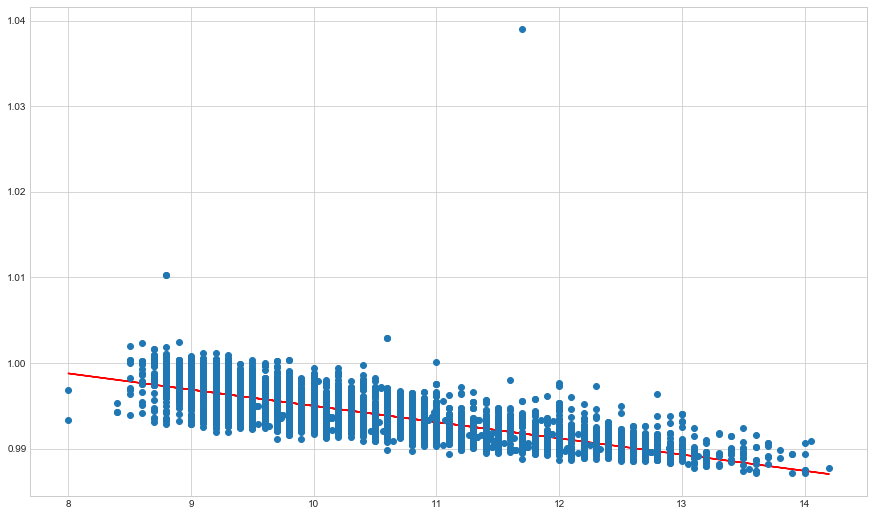

In [24]:
x_rs_alcohol = wine['alcohol']
slope_alc, intercept_alc, r_value_alc, p_value_alc, std_err_alc = linregress(x_rs_alcohol,y)
print('slope = ', slope_alc)
print('intercept =',intercept_alc)
print('r_value = ', r_value_alc)
print('p_value = ',p_value_alc)
print(std_err_alc)
from pylab import plot,show
line = slope_alc*x_rs_alcohol+intercept_alc
plot(x_rs_alcohol,line,'r-',x_rs_alcohol,y,'o')
show()

Is the relationship significant?
Null hypothesis is that the  relationship between predictor and outcome is not linear
From the above plot
1)From the p-values(0.00) our null hypothesis stands incorrect which means there is a significant relationship between 
predictor and outcome variable.
2)Also, from the linear regression plots shown above, we can clearly infer from the slope values 
that for each change in predictor variable there is a linear change in the outcome variable making 
the model significant.

# Determining Multivariate Normality

Text(0.5,1,'Plot for erros')

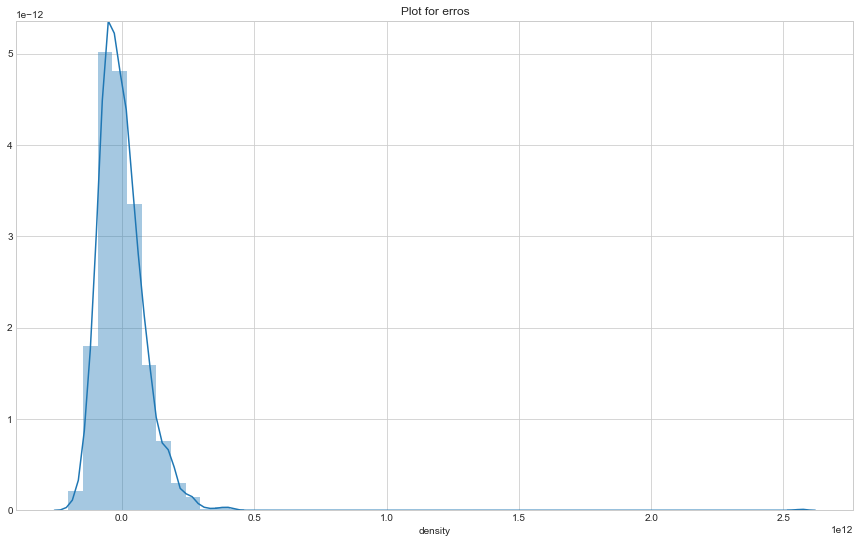

In [25]:
sb.distplot((y_test-predictions)*100000000000000).set_title('Plot for erros')


In [26]:
print(predictions)

[ 0.99119581  0.99002164  0.99289432 ...,  0.99323519  0.99215427
  0.99103557]


Text(0,0.5,'Residual')

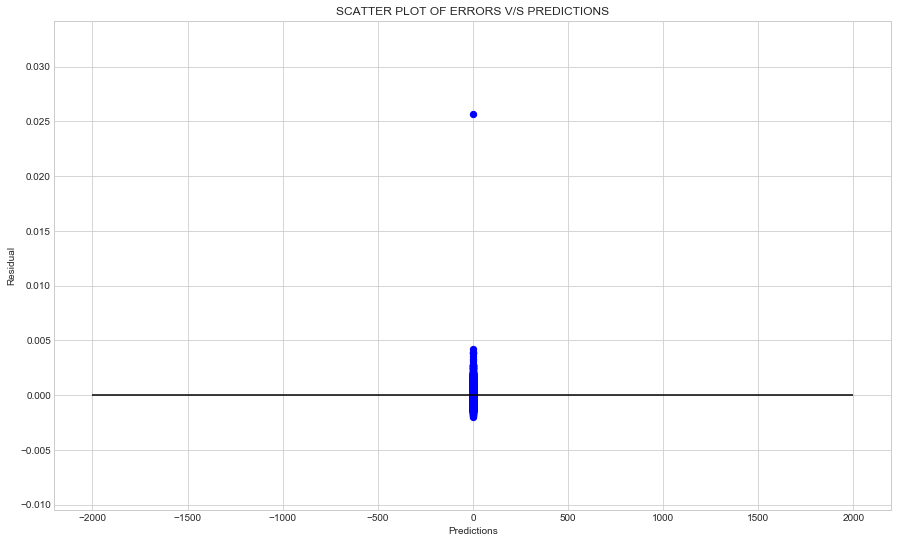

In [27]:
plt.scatter(predictions,y_test-predictions,c='b',s=40)
plt.hlines(y=0, xmin=-2000, xmax=2000)
plt.title('SCATTER PLOT OF ERRORS V/S PREDICTIONS')
plt.xlabel('Predictions')
plt.ylabel('Residual')

In [28]:
result.pvalues

residual sugar    0.0
alcohol           0.0
dtype: float64

# Determining the significant predictor 

[ 0.99140511  0.99204341  0.99150331 ...,  0.99145421  0.99187156
  0.99135601]


Text(0,0.5,'predictions')

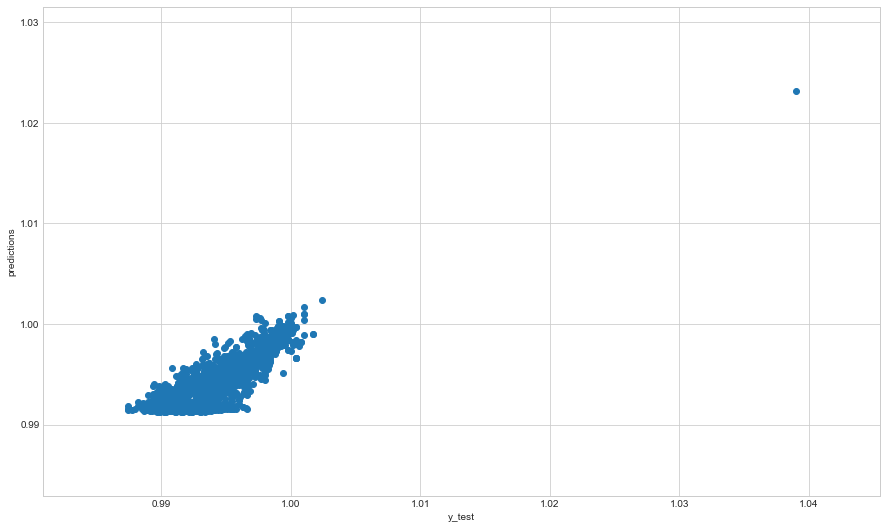

In [29]:
X_imp1 = wine[['residual sugar']]
y_imp1 = wine['density']
X_train_imp1, X_test_imp1, y_train_imp1, y_test_imp1 = train_test_split(X_imp1, y_imp1, test_size=0.4, random_state=101)
lm = LinearRegression()
lm.fit(X_train_imp1,y_train_imp1)
predictions_imp1 = lm.predict(X_test_imp1)
print(predictions_imp1)
plt.scatter(y_test_imp1,predictions_imp1)
plt.xlabel('y_test')
plt.ylabel('predictions')

# Summary when predictor  = Residual Sugar

In [30]:
result_imp1 = sm.OLS( y_imp1, X_imp1 ).fit()
result_imp1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                density   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     7859.
Date:                Fri, 16 Feb 2018   Prob (F-statistic):               0.00
Time:                        23:36:46   Log-Likelihood:                -4576.1
No. Observations:                4898   AIC:                             9154.
Df Residuals:                    4897   BIC:                             9161.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
residual sugar     0.0956      0.001     88.649      0.000       0.094       0.098
==============================================================================
Omnibus:                     1042.523   Durbin-Watson:                   1.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3333.850
Skew:                          -1.074   Prob(JB):                         0.00
Kurtosis:                       6.424   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[ 0.99255068  0.99008177  0.99501959 ...,  0.99558934  0.99350026
  0.99236076]


Text(0,0.5,'predictions')

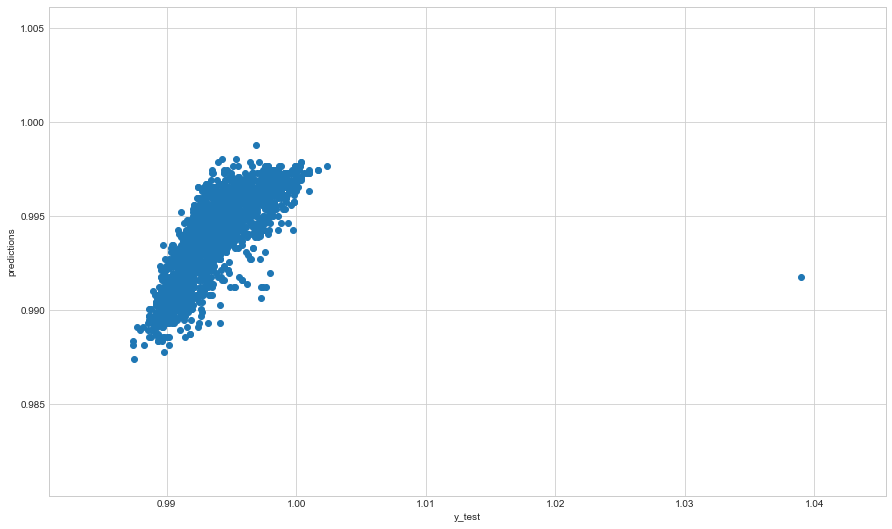

In [31]:
X_imp2 = wine[['alcohol']]
y_imp2 = wine['density']
X_train_imp2, X_test_imp2, y_train_imp2, y_test_imp2 = train_test_split(X_imp2, y_imp2, test_size=0.4, random_state=101)
lm = LinearRegression()
lm.fit(X_train_imp2,y_train_imp2)
predictions_imp2 = lm.predict(X_test_imp2)
print(predictions_imp2)
plt.scatter(y_test_imp2,predictions_imp2)
plt.xlabel('y_test')
plt.ylabel('predictions')

# Summary when predictor = Alcohol

In [32]:
result_imp2 = sm.OLS( y_imp2, X_imp2 ).fit()
result_imp2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                density   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 3.433e+05
Date:                Fri, 16 Feb 2018   Prob (F-statistic):               0.00
Time:                        23:36:47   Log-Likelihood:                 3522.6
No. Observations:                4898   AIC:                            -7043.
Df Residuals:                    4897   BIC:                            -7037.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
alcohol        0.0932      0.000    585.958      0.000       0.093       0.094
==============================================================================
Omnibus:                      437.480   Durbin-Watson:                   1.483
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              289.066
Skew:                          -0.478   Prob(JB):                     1.70e-63
Kurtosis:                       2.290   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Are any model assumptions violated?
The model has 5 assumptions:
Linear Relationship – This assumption is not violated since from the slope plot ,  each of the predictor is linearly related to the outcome variablel
Multivariate normality – This assumption is not violated since the residual plot is normally distributed
No or little multicollinearity – This assumption is not violated since from the heat map the correlation between residual sugar and alcohol is -0.45
No autocorrelation – This model assumption is not violated since the Durbin-watson value is in the range of 1.5 – 2.5. The value is 0.87
Homoscedasticity – This model assumption is not violated since there is equal variance accross the line from the above plot


Is there any multi-colinearity in the model?
No, there is not much multi-colinearity in the model since the correlation between residual sugar and alcohol is -0.45


In the multiple regression models are predictor variables   independent of all the other predictor variables?

Yes, the predictor variables are almost independent of the other predictor variables 


In in multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model

The most significant predictor is Alcohol since R2 is 0.986 and insignificant is residual sugar since its R2 is 0.6 


Does the model make sense? 
Yes, the model makes sense since since the R2  is 0.99.

# Cross Validation using K-fold

In [33]:
X_actual = wine[['residual sugar','alcohol']].values
Y_actual = wine[['density']].values

In [34]:
# RMSE using 5-fold cross-validation
kf = KFold(len(X_actual), n_folds=10)

In [35]:
for train,test in kf:
    print (train)
    print (test)

[ 490  491  492 ..., 4895 4896 4897]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 2

In [36]:
scores = []
for train, test in kf:
    lm.fit(X_actual[train],Y_actual[train])
    scores.append(np.sqrt(metrics.mean_squared_error(Y_actual[test], lm.predict(X_actual[test]))))
scores

[0.00067873736068670262,
 0.00073776088131493288,
 0.0010989807972386224,
 0.0010809794715377766,
 0.0010392889332364711,
 0.0014297779559359189,
 0.00075876765974146429,
 0.00073954309594651338,
 0.00076234536938558852,
 0.00082561112332339996]

In [37]:
def show_stats(m, ncv, cv):
  print('Method: %s' %m)
  print('RMSE on no CV training: %.3f' %ncv)
  print('RMSE on 10-fold CV: %.3f' %cv)

In [38]:
show_stats('Simple Linear Regression',rmse ,np.mean(scores))

Method: Simple Linear Regression
RMSE on no CV training: 0.001
RMSE on 10-fold CV: 0.001


Cross-validate the model. How well did it do?

Cross validation did not make any difference for my model. It shows R2 as 0.001 which was the same initially



# Regularization

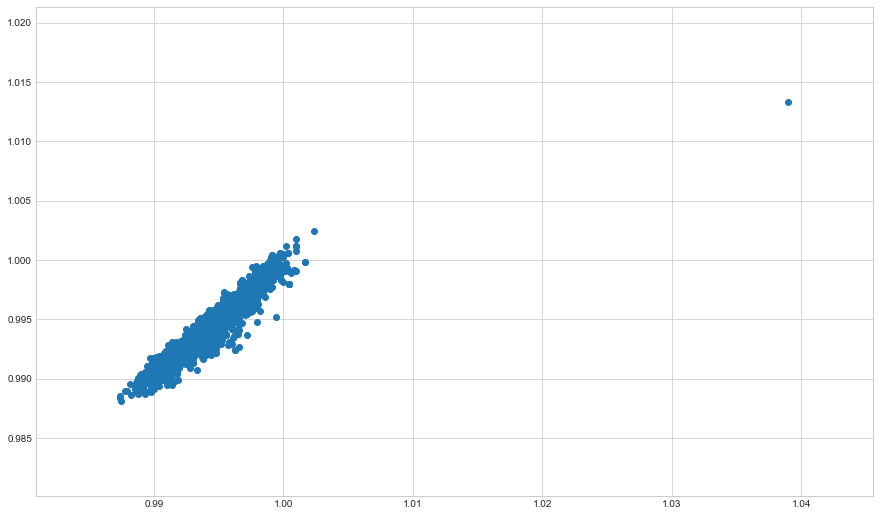

In [39]:
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train,y_train)
y_pred_linear = ridge.predict(X_test)
plt.scatter(y_test, y_pred_linear)

In [40]:
rmse =  np.sqrt(metrics.mean_squared_error(y_test,y_pred_linear))
print(rmse)

0.00100664423596


Does regularization help with creating models that validate better on out of sample data?

No regularization does not help with creating models that validate better on the test data since the RMSE remains the same



# Cross Validation after Regularization 

In [41]:
# RMSE using 5-fold cross-validation
kf = KFold(len(X_actual), n_folds=10)

In [42]:
for train,test in kf:
    print (train)
    print (test)

[ 490  491  492 ..., 4895 4896 4897]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 2

In [43]:
scores = []
for train, test in kf:
    ridge.fit(X_actual[train],Y_actual[train])
    scores.append(np.sqrt(metrics.mean_squared_error(Y_actual[test], lm.predict(X_actual[test]))))
scores

[0.00067792907826627201,
 0.00073086326746246819,
 0.0010291316690990023,
 0.0010269128106011002,
 0.00097817778549442341,
 0.0013870571747921442,
 0.00075559155018321042,
 0.00074461482385912859,
 0.00075535124684045565,
 0.00082561112332339996]

In [44]:
def show_stats(m, ncv, cv):
  print('Method: %s' %m)
  print('RMSE on no CV training: %.3f' %ncv)
  print('RMSE on 10-fold CV: %.3f' %cv)

# RMSE on Cross validation after regularization

In [45]:
show_stats('Simple Linear Regression',rmse ,np.mean(scores))

Method: Simple Linear Regression
RMSE on no CV training: 0.001
RMSE on 10-fold CV: 0.001


# Logistic Regression

In [46]:
wine_logistic = wine[['fixed acidity', 'volatile acidity','citric acid','chlorides','density','free sulfur dioxide','total sulfur dioxide','pH','sulphates','quality_cat']]

In [47]:
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split((wine_logistic).drop('quality_cat',axis=1),wine['quality_cat'], test_size=0.30, 
                                                   random_state=101)

In [48]:
logmodel = LogisticRegression()

In [49]:
logmodel.fit(X_train_logistic,y_train_logistic)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
print('Accuracy of logistic regression = ' ,logmodel.score(X_test_logistic,y_test_logistic))

Accuracy of logistic regression =  0.78843537415


In [51]:
predictions_logistic = logmodel.predict(X_test_logistic)

In [52]:
X_test_logistic.shape

(1470, 9)

In [53]:
predictions_logistic.shape

(1470,)

In [54]:
print(classification_report(y_test_logistic,predictions_logistic))

             precision    recall  f1-score   support

          0       0.79      0.99      0.88      1164
          1       0.27      0.01      0.02       306

avg / total       0.68      0.79      0.70      1470



In [55]:
print(confusion_matrix(y_test_logistic,predictions_logistic))

[[1156    8]
 [ 303    3]]


In [56]:
np.sqrt(metrics.mean_squared_error(y_test_logistic,predictions_logistic))

0.45996154823021906

# ROC curve

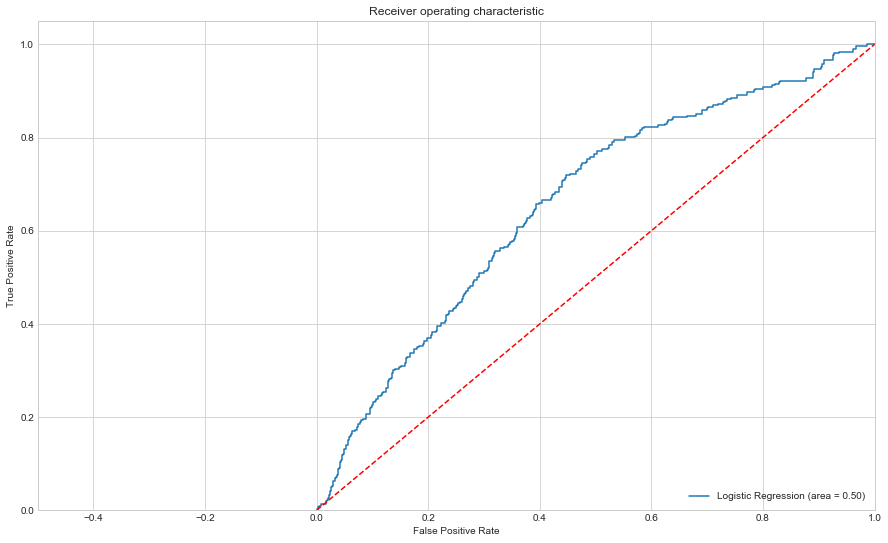

In [57]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_logistic,logmodel.predict(X_test_logistic))
fpr, tpr, thresholds = roc_curve(y_test_logistic, logmodel.predict_proba(X_test_logistic)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.5, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Cross Validation 

In [58]:
k=5
acc=[]
for i in range(k):
   X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(wine_logistic, wine['quality_cat'], test_size= 0.2, random_state=i)
   # Logistic regression metrics
   lrm = logmodel.fit(X_train_logistic, y_train_logistic)
   a=metrics.accuracy_score(y_test_logistic, lrm.predict(X_test_logistic))
   acc.append(a)
   
print ('Accuracy post cross validation =', np.mean(acc))


Accuracy post cross validation = 0.78843537415


Cross validation the model did not help since it gives the same accuracy as it gave prior to cross validating it. Accuracy  = 0.78